## Ensembling
In this notebook we will use ensembling models to do predictions of all the models i.e KNN, Logistic Regression, Random Forest and LGBM and Naive Bayes to build 

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

## Loading the test predictions

In [96]:
# Load test data and predictions
test = pd.read_csv('Helper_functions/X_test.csv')
rf = pd.read_csv('rf_test_score.csv')
lr = pd.read_csv('LR_test_score.csv')
knn = pd.read_csv('KNN_test_score.csv')
lgbm = pd.read_csv('LGBM_test_score.csv')
nv = pd.read_csv('mnb_test_score.csv')

In [97]:
y_test = test['y_test']

## Defining Ensembling function

In [90]:
def ensemble(outputs, weights=None):
    if weights==None:
        x = np.mean(outputs, axis=1)
        return np.array(list(map(int,x>=0.5)))
    else:
        x = np.sum(weights*outputs,axis=1)
        return np.array(list(map(int,x>=0.5)))

## Prediction using Ensembling

In [91]:
result_list = [rf.values, knn.values, lgbm.values,nv.values, lr.values]
results = np.hstack(result_list)

#### 1 Predict with equal weights

In [92]:
ensembled_result = ensemble(results)

In [93]:
accuracy_score(ensembled_result, y_test)

0.737069327759569

#### 2 Predict with specific weights

In [94]:
ensembled_result = ensemble(results, [.45,.15,.10,.2,.10])

In [98]:
accuracy_score(ensembled_result, y_test)

0.7499783122012844

## ROC Curve

In [99]:
def ensemble(outputs, weights=None):
    if weights==None:
        x = np.mean(outputs, axis=1)
        return x
    else:
        x = np.sum(weights*outputs,axis=1)
        return x

In [100]:
ensembled_result = ensemble(results)

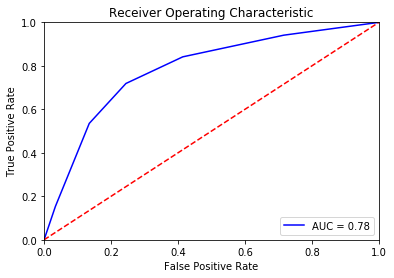

In [101]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ensembled_result)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


We see that ensembling model does not perform better than individual Random Forest model. It can be due to all the models not being independent. We can use the ROC curve threshods to get better Precision or recall but accuracy will not go higher than Random Forest individual best